1. Identify High-Performing Genres

In [6]:
import sqlite3
import pandas as pd

# Connect to the database (replace 'movies.db' with your database file)
conn = sqlite3.connect('im.db')

# Create a cursor object to execute SQL queries
cursor = conn.cursor()


In [7]:

# Load necessary tables into pandas DataFrames
movie_basics = pd.read_sql_query("SELECT movie_id, primary_title, genres FROM movie_basics", conn)
movie_ratings = pd.read_sql_query("SELECT movie_id, averagerating FROM movie_ratings", conn)



Top Genres by Average Rating:
         genres  averagerating
21        Short       8.800000
7   Documentary       7.332090
11    Game-Show       7.300000
17         News       7.271330
4     Biography       7.162274
14        Music       7.091972
12      History       7.040956
22        Sport       6.961493
24          War       6.584291
18   Reality-TV       6.500000


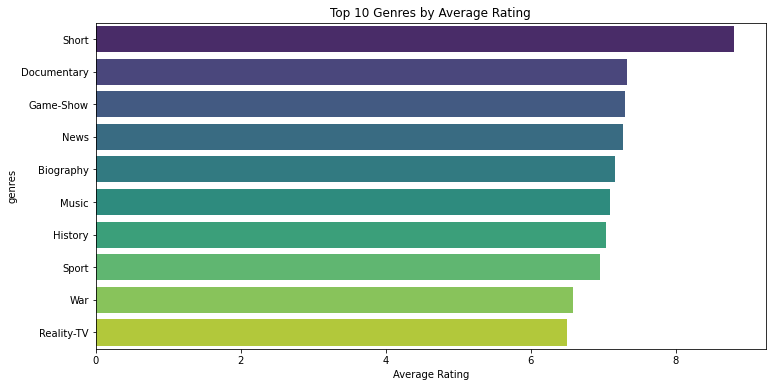

In [8]:
# Merge movie_basics and movie_ratings on 'movie_id'
movies = pd.merge(movie_basics, movie_ratings, on='movie_id')

# Drop rows with missing genres
movies = movies.dropna(subset=['genres'])

# Split genres and explode the DataFrame
movies['genres'] = movies['genres'].str.split(',')
movies_exploded = movies.explode('genres')

# Calculate average rating per genre
genre_ratings = movies_exploded.groupby('genres')['averagerating'].mean().reset_index()

# Sort genres by average rating
genre_ratings = genre_ratings.sort_values(by='averagerating', ascending=False)

print("Top Genres by Average Rating:")
print(genre_ratings.head(10))

#Plotting.
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='averagerating', y='genres', data=genre_ratings.head(10), palette='viridis')
plt.title('Top 10 Genres by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('genres')
plt.show()


2. Evaluate Box Office Success Using Attributes

In [9]:
# Load necessary tables into pandas DataFrames
movie_basics = pd.read_sql_query("SELECT movie_id, primary_title, genres, runtime_minutes FROM movie_basics", conn)
movie_ratings = pd.read_sql_query("SELECT movie_id, averagerating FROM movie_ratings", conn)

# Merge the tables on 'movie_id'
movies = pd.merge(movie_basics, movie_ratings, on='movie_id')

# Drop rows with missing values
movies = movies.dropna(subset=['genres', 'runtime_minutes', 'averagerating'])


In [10]:
# Split genres and explode the DataFrame
movies['genres'] = movies['genres'].str.split(',')
movies_exploded = movies.explode('genres')

# Calculate the number of movies per genre
genre_distribution = movies_exploded['genres'].value_counts().reset_index()
genre_distribution.columns = ['Genre', 'Movie Count']

print("Genre Distribution:")
print(genre_distribution.head(10))


Genre Distribution:
         Genre  Movie Count
0        Drama        28394
1  Documentary        16423
2       Comedy        15514
3     Thriller         7583
4       Horror         6917
5       Action         6297
6      Romance         5976
7        Crime         4338
8    Biography         3693
9    Adventure         3621


In [11]:
# Group by runtime and calculate average rating
runtime_performance = movies.groupby('runtime_minutes')['averagerating'].mean().reset_index()

# Sort by average rating
runtime_performance = runtime_performance.sort_values(by='averagerating', ascending=False)

print("Average Rating by Runtime:")
print(runtime_performance.head(10))


Average Rating by Runtime:
     runtime_minutes  averagerating
280            607.0           9.30
269            379.0           9.20
270            383.0           9.20
239            261.0           9.00
286           1440.0           8.90
273            467.0           8.90
231            247.0           8.85
203            207.0           8.80
268            364.0           8.70
249            287.0           8.70


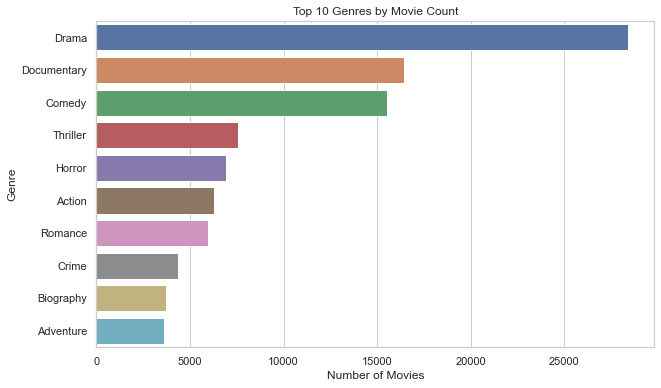

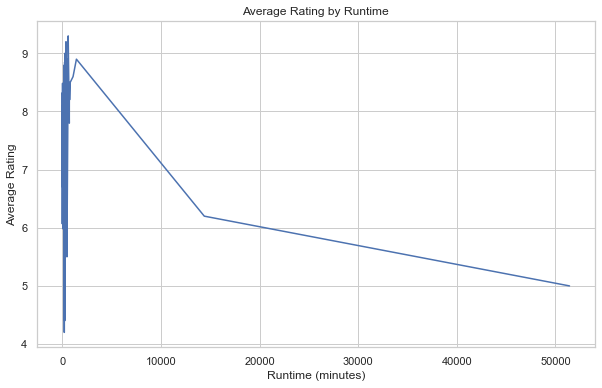

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Plot genre distribution
plt.figure(figsize=(10, 6))
sns.barplot(x='Movie Count', y='Genre', data=genre_distribution.head(10))
plt.title('Top 10 Genres by Movie Count')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

# Plot average rating by runtime
plt.figure(figsize=(10, 6))
sns.lineplot(x='runtime_minutes', y='averagerating', data=runtime_performance)
plt.title('Average Rating by Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average Rating')
plt.show()


3. Ratings against genres.

In [13]:
# Load necessary tables into pandas DataFrames
movie_basics = pd.read_sql_query("SELECT movie_id, primary_title, genres FROM movie_basics", conn)
movie_ratings = pd.read_sql_query("SELECT movie_id, averagerating FROM movie_ratings", conn)

# Merge the tables on 'movie_id'
movies = pd.merge(movie_basics, movie_ratings, on='movie_id')

# Drop rows with missing values
movies = movies.dropna(subset=['genres', 'averagerating'])

In [14]:
# Split genres and explode the DataFrame
movies['genres'] = movies['genres'].str.split(',')
movies_exploded = movies.explode('genres')

# Calculate average rating per genre
genre_ratings = movies_exploded.groupby('genres')['averagerating'].mean().reset_index()

# Sort by average rating
genre_ratings = genre_ratings.sort_values(by='averagerating', ascending=False)

print("Average Ratings by Genre:")
print(genre_ratings)


Average Ratings by Genre:
         genres  averagerating
21        Short       8.800000
7   Documentary       7.332090
11    Game-Show       7.300000
17         News       7.271330
4     Biography       7.162274
14        Music       7.091972
12      History       7.040956
22        Sport       6.961493
24          War       6.584291
18   Reality-TV       6.500000
15      Musical       6.498336
8         Drama       6.401559
9        Family       6.394725
3     Animation       6.248308
2     Adventure       6.196201
19      Romance       6.146608
6         Crime       6.115441
5        Comedy       6.002689
16      Mystery       5.920401
10      Fantasy       5.919473
25      Western       5.868214
0        Action       5.810361
23     Thriller       5.639114
20       Sci-Fi       5.489755
13       Horror       5.003440
1         Adult       3.766667


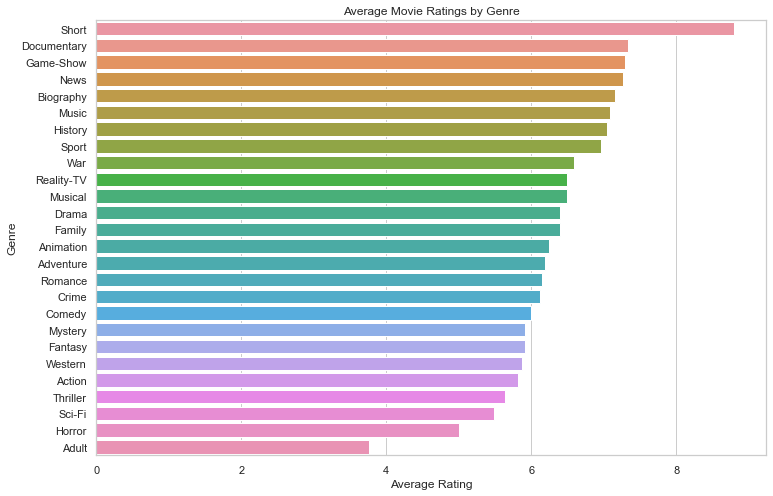

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Plot average rating by genre
plt.figure(figsize=(12, 8))
sns.barplot(x='averagerating', y='genres', data=genre_ratings)
plt.title('Average Movie Ratings by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()


In [ ]:
#View the movie_akas table
movie_akas = pd.read_sql_query("SELECT * FROM movie_akas", conn)
print(movie_akas.head())

#View the movie_basics table.
movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)
print(movie_basics.head())



    movie_id  ordering                                    title region  \
0  tt0369610        10                            Джурасик свят     BG   
1  tt0369610        11                        Jurashikku warudo     JP   
2  tt0369610        12  Jurassic World: O Mundo dos Dinossauros     BR   
3  tt0369610        13                  O Mundo dos Dinossauros     BR   
4  tt0369610        14                           Jurassic World     FR   

  language        types   attributes  is_original_title  
0       bg         None         None                0.0  
1     None  imdbDisplay         None                0.0  
2     None  imdbDisplay         None                0.0  
3     None         None  short title                0.0  
4     None  imdbDisplay         None                0.0  
    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season        

In [21]:
#View the movie_ratings table.
movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)
print(movie_ratings.head())

#View the principals table.
principals = pd.read_sql_query("SELECT * FROM principals", conn)
print(principals.head())


     movie_id  averagerating  numvotes
0  tt10356526            8.3        31
1  tt10384606            8.9       559
2   tt1042974            6.4        20
3   tt1043726            4.2     50352
4   tt1060240            6.5        21
    movie_id  ordering  person_id  category       job        characters
0  tt0111414         1  nm0246005     actor      None       ["The Man"]
1  tt0111414         2  nm0398271  director      None              None
2  tt0111414         3  nm3739909  producer  producer              None
3  tt0323808        10  nm0059247    editor      None              None
4  tt0323808         1  nm3579312   actress      None  ["Beth Boothby"]


In [22]:
#View the known_for table.
known_for = pd.read_sql_query("SELECT * FROM known_for", conn)
print(known_for.head())

#View the persons table.
persons = pd.read_sql_query("SELECT * FROM persons", conn)
print(persons.head())


   person_id   movie_id
0  nm0061671  tt0837562
1  nm0061671  tt2398241
2  nm0061671  tt0844471
3  nm0061671  tt0118553
4  nm0061865  tt0896534
   person_id       primary_name  birth_year  death_year  \
0  nm0061671  Mary Ellen Bauder         NaN         NaN   
1  nm0061865       Joseph Bauer         NaN         NaN   
2  nm0062070         Bruce Baum         NaN         NaN   
3  nm0062195       Axel Baumann         NaN         NaN   
4  nm0062798        Pete Baxter         NaN         NaN   

                                 primary_profession  
0         miscellaneous,production_manager,producer  
1        composer,music_department,sound_department  
2                        miscellaneous,actor,writer  
3  camera_department,cinematographer,art_department  
4  production_designer,art_department,set_decorator  
